### Counting with RNN

**Simple Input**: (0, 0, 0, 0, 1, 0, 1, 0, 1, 0)

**Output**: 3

**Formula**: $$s_t=f(Ws_{t-1} + Ux_t)$$

In [1]:
import numpy as np

x = np.array([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0]])
y = np.array([3])

In [2]:
def step(s, x, u, w):
    return x * u + s * w

def forward(x, u, w):
    n_samples = len(x)

    # length of each sample
    seq_len = len(x[0])

    # initialize state activation for each sample along the sequence
    s = np.zeros((n_samples, seq_len + 1))

    # update states over sequence
    for t in range(0, seq_len):
        s[:, t + 1] = step(s[:, t], x[:, t], u, w)  # step function

    return s

def backward(x, s, y, w):
    seq_len = len(x[0])

    # network output is just the last activation of sequence
    s_t = s[:, -1]

    # compute gradient of output wrt MSE loss function
    gS = 2 * (s_t - y)

    # set gradient accumilations to 0
    gU, gW = 0, 0

    # accumulate gradients backwards
    for k in range(seq_len, 0, -1):
        # compute parameter gradients and accumulate results
        gU += np.sum(gS * x[:, k - 1])
        gW += np.sum(gS * s[:, k - 1])

        # compute gradient as the output of previous layer
    gS *= w
    return gU, gW

In [11]:
def train(x, y, epoch, lr=5e-4):
    # set initial parameters
    weights = (-2, 0)

    losses = list()
    grad_u, grad_w = list(), list()

    # iterative gradient descent
    for i in range(epoch):
        # forward pass
        s = forward(x, weights[0], weights[1])

        # compute loss
        loss = (y[0] - s[-1, -1])**2

        # store loss and weight values for later display
        losses.append(loss)

        gradients = backward(x, s, y, weights[1])
        grad_u.append(gradients[0])
        grad_w.append(gradients[1])

        # update each parameter 'p' by p-=(gradient * lr)
        weights = tuple((p - gp * lr) for p, gp in zip(weights, gradients))

    return np.array(losses), np.array(grad_u), np.array(grad_w), s[-1, -1]


In [12]:
import matplotlib.pyplot as plt

def plot_training(losses, grad_u, grad_w):
    losses = losses[~np.isnan(losses)][:-1]
    grad_u = grad_u[~np.isnan(grad_u)][:-1]
    grad_w = grad_w[~np.isnan(grad_w)][:-1]

    # plot weights u & w
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_ylim(-3, 600)
    ax1.set_xlabel('epochs')
    ax1.plot(grad_u, label='gradient U', color='blue', linestyle=':')
    ax1.plot(grad_w, label='gradient W', color='red', linestyle='--')
    ax1.legend(loc='upper left')

    # plot exploding gradients
    ax2 = ax1.twinx()
    ax2.plot(losses, label='loss', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')
    fig.tight_layout()

    plt.show()


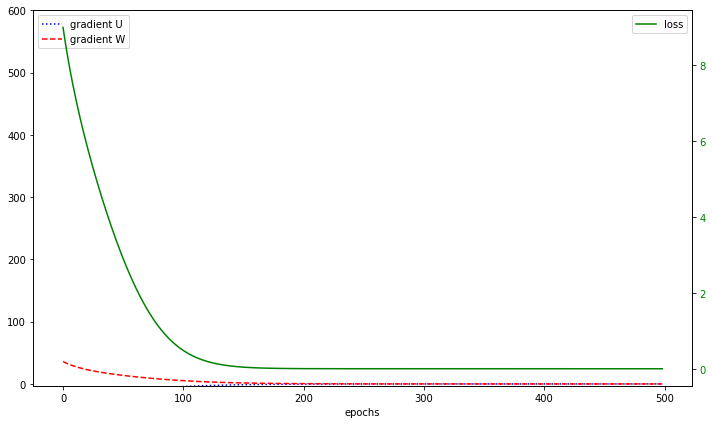

In [16]:
losses, gradients_u, gradients_w, output = train(x, y, epoch=500)
plot_training(losses, gradients_u, gradients_w)


In [17]:
print(f'Input: {y[0]}\tOutput:{output}')

Input: 3	Output:2.999988963659208
